In [ ]:
import pandas as pd,numpy as np, seaborn as sns,matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##1.Null Handling and Duplicate values

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(891, 12)

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
imputer=KNNImputer()

In [ ]:
|df=pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

SyntaxError: invalid syntax (ipython-input-111-2200647250.py, line 1)

Since KNN imputer works well with only label encoded data, we will not move forward with this and use central tendencies and use only mode as the columns logically require a mode like approach

In [ ]:
for i in df.columns:
  if(df[i].dtype=="object"):
    df[i].fillna(df[i].mode(),inplace=True)
  else:
    df[i].fillna(df[i].median(),inplace=True)

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


There are 685 nulls in Cabin column which is more than 40% of our dataset so we will drop that column all together

In [ ]:
df.drop('Cabin',axis=1,inplace=True)

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


##2.Outlier Detection

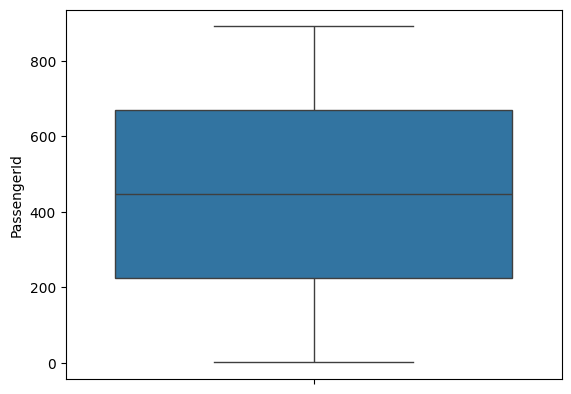

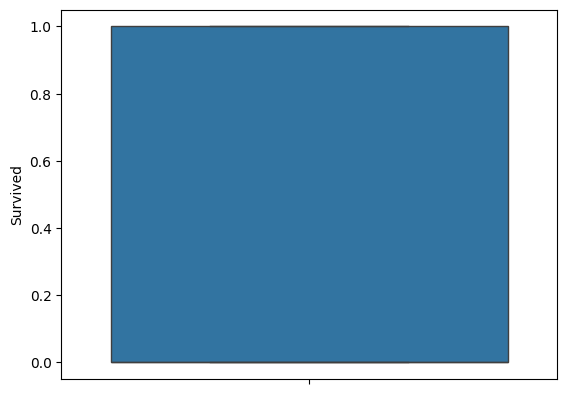

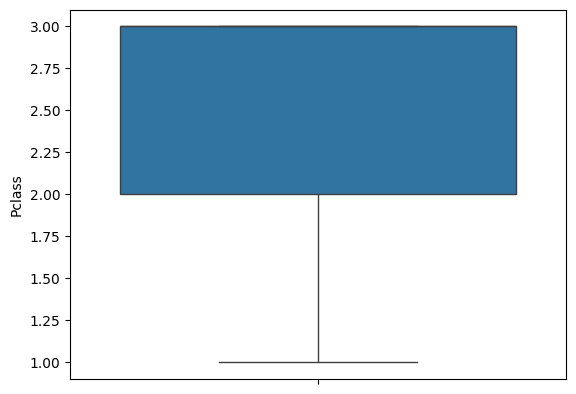

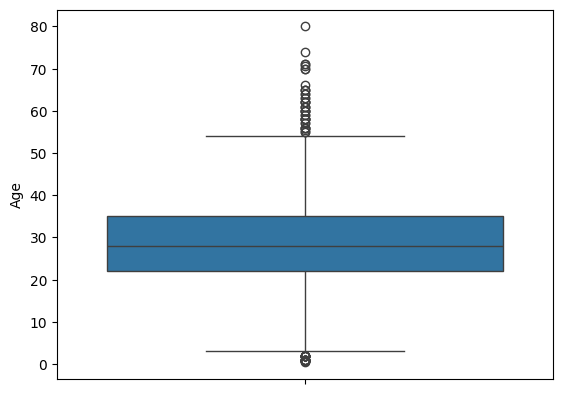

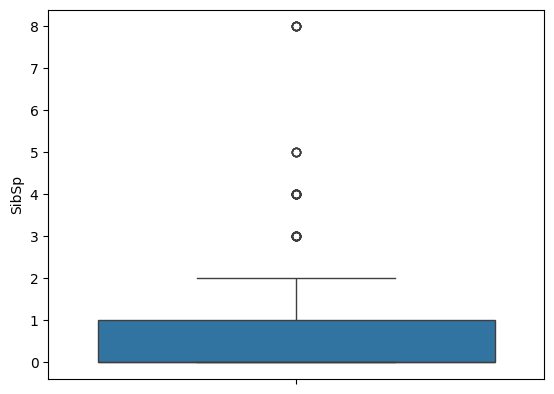

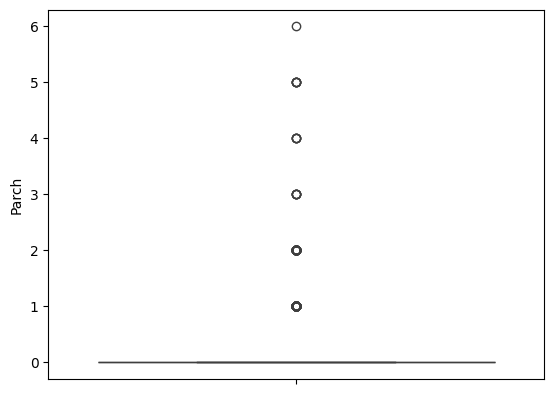

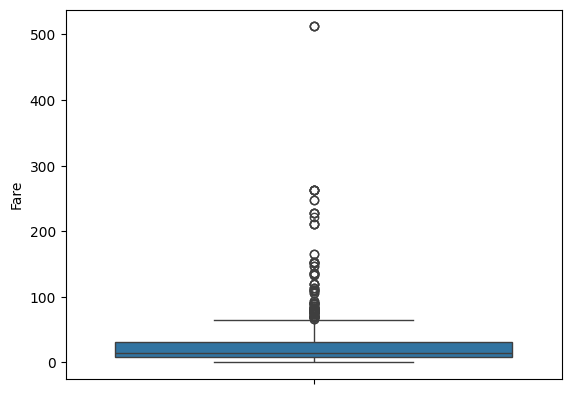

In [ ]:
for i in df.columns:
  if(df[i].dtype!="object"):
    sns.boxplot(df[i])
    plt.show()

In [ ]:
#Age,SibSp,Fare
for i in ['Age','SibSp','Fare']:
  q3=df[i].quantile(0.75)
  q1=df[i].quantile(0.25)
  iqr=q3-q1

  ul=q3+ 1.5*iqr
  ll=q1- (1.5*iqr)

  df=df[(df[i]>=ll)&(df[i]<=ul)]

##3.Encoding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 684 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  684 non-null    int64  
 1   Survived     684 non-null    int64  
 2   Pclass       684 non-null    int64  
 3   Name         684 non-null    object 
 4   Sex          684 non-null    object 
 5   Age          684 non-null    float64
 6   SibSp        684 non-null    int64  
 7   Parch        684 non-null    int64  
 8   Ticket       684 non-null    object 
 9   Fare         684 non-null    float64
 10  Embarked     684 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 64.1+ KB


We can use One hot encoding but that will increase the complexity of the dataset so we will go on with the standard Label Encoder

In [ ]:
df_raw=df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

In [ ]:
for i in df.columns:
  if(df[i].dtype=='object'):
    df[i]=le.fit_transform(df[i])

##4.Scaling

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 684 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  684 non-null    int64  
 1   Survived     684 non-null    int64  
 2   Pclass       684 non-null    int64  
 3   Name         684 non-null    int64  
 4   Sex          684 non-null    int64  
 5   Age          684 non-null    float64
 6   SibSp        684 non-null    int64  
 7   Parch        684 non-null    int64  
 8   Ticket       684 non-null    int64  
 9   Fare         684 non-null    float64
 10  Embarked     684 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 64.1 KB


In [ ]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

We have different scaling methods, but we will use minmax scaler as there are no columns with negative values to use maxabs scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [ ]:
dfscaled=scaler.fit_transform(df)
dfscaled=pd.DataFrame(dfscaled,columns=df.columns)

In [ ]:
dfscaled.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,1.0,1.0,0.372549,0.5,0.0,0.127193,1.0
1,1.0,1.0,0.0,0.450980,0.0,0.0,0.139035,1.0
2,1.0,0.0,0.0,0.627451,0.5,0.0,0.931579,1.0
3,0.0,1.0,1.0,0.627451,0.0,0.0,0.141228,1.0
4,0.0,1.0,1.0,0.490196,0.0,0.0,0.148391,0.5


In [ ]:
corr=dfscaled.corr()

In [ ]:
corr['Fare'].sort_values(ascending=False)

,Fare
Fare,1.000000
SibSp,0.357118
Survived,0.286069
Parch,0.276607
Age,0.162111
Embarked,-0.008918
Sex,-0.160465
Pclass,-0.634819


#Model Creation

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=dfscaled.loc[:,dfscaled.columns !='Fare']
y=dfscaled['Fare']

In [ ]:
xTrain,xTest,yTrain,yTest=train_test_split(x,y,train_size=0.8,random_state=42)

In [ ]:
print(yTrain.shape[0],yTest.shape[0])

547 137


In [ ]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

In [ ]:
model.fit(xTrain,yTrain)

LinearRegression()

In [ ]:
yPred=model.predict(xTest)

In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(yTest,yPred)
r2

0.6036687240205683

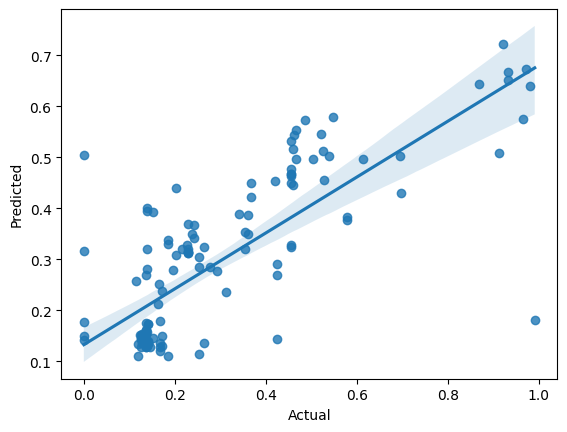

In [ ]:
sns.regplot(x=yTest,y=yPred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
weights=pd.Series(model.coef_,index=xTrain.columns)
weights.sort_values(ascending=False)

,0
Parch,0.367420
SibSp,0.258646
Survived,0.043267
Age,0.035116
Sex,0.021673
Embarked,-0.007241
Pclass,-0.360286
